In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [3]:
data = pd.read_csv('/content/Admission_Predict_Ver1.1.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
summary=data.describe(include='all').T
summary['range']=summary['max']-summary['min']
print('\nSummary Statistics: ')
print(summary)



Summary Statistics: 
                   count       mean         std     min       25%     50%     75%     max   range
Serial No.         500.0  250.50000  144.481833    1.00  125.7500  250.50  375.25  500.00  499.00
GRE Score          500.0  316.47200   11.295148  290.00  308.0000  317.00  325.00  340.00   50.00
TOEFL Score        500.0  107.19200    6.081868   92.00  103.0000  107.00  112.00  120.00   28.00
University Rating  500.0    3.11400    1.143512    1.00    2.0000    3.00    4.00    5.00    4.00
SOP                500.0    3.37400    0.991004    1.00    2.5000    3.50    4.00    5.00    4.00
LOR                500.0    3.48400    0.925450    1.00    3.0000    3.50    4.00    5.00    4.00
CGPA               500.0    8.57644    0.604813    6.80    8.1275    8.56    9.04    9.92    3.12
Research           500.0    0.56000    0.496884    0.00    0.0000    1.00    1.00    1.00    1.00
Chance of Admit    500.0    0.72174    0.141140    0.34    0.6300    0.72    0.82    0.97    0.6

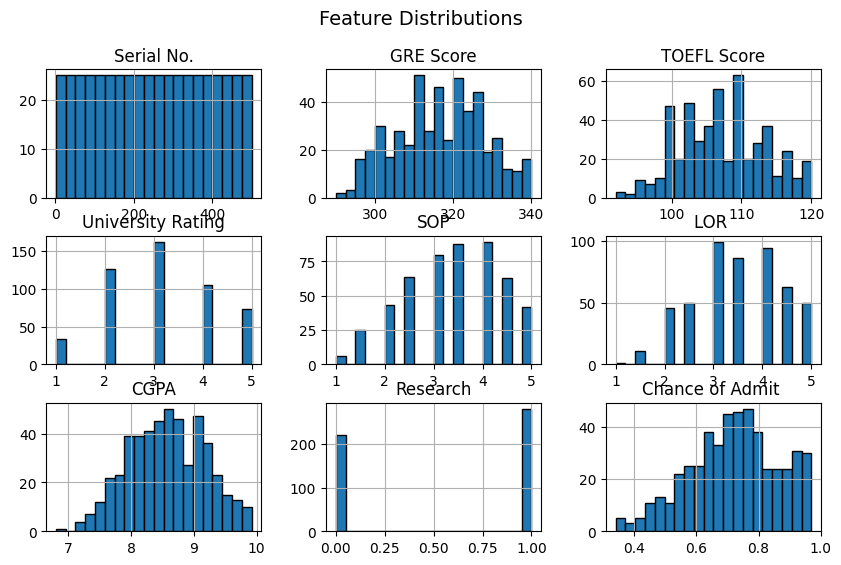

In [6]:
data.hist(figsize=(10,6),bins=20,edgecolor='black')
plt.suptitle('Feature Distributions',fontsize=14)
plt.show()

In [12]:
data.fillna(data.mean(numeric_only=True), inplace=True)
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [14]:
for col in data.select_dtypes(include=['object']).columns:
  data[col]=LabelEncoder().fit_transform(data[col])

In [19]:
X=data.drop(columns='Chance of Admit ')
y=data['Chance of Admit ']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [23]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [24]:
y_pred=model.predict(X_test)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\nRegression Report:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}")
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score (R²): {r2_score(y_test, y_pred)}")



Regression Report:
Mean Absolute Error (MAE): 0.03991299999999999
Mean Squared Error (MSE): 0.003302065099999999
Root Mean Squared Error (RMSE): 0.05746359804258692
R-squared Score (R²): 0.8385298239608803
